In [80]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('train.csv')

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [85]:
# 1
# cheeck Datatypes
# handle Datatypes
dtypes = df.dtypes
n_unique = df.nunique()
dtypes

Survived      int64
Pclass        int64
Sex             str
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin           str
Embarked        str
dtype: object

In [86]:
pd.DataFrame({'Dtype': dtypes, 'num_unique':n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [87]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({'Dtype': dtypes, 'num_unique':n_unique}).T


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [88]:
def chk_type(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({'Dtype': dtypes, 'num_unique':n_unique}).T

In [89]:
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [90]:
from preprocessing.chk_t import chk_type 

In [91]:
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [92]:
cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
df[cols] = df[cols].astype('category')

In [93]:
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
num_unique,2,3,2,88,7,7,248,147,3


In [94]:
def handle_types(cols) :
    df[cols] = df[cols].astype('category')
    chk_type()
# convert pipline


In [95]:
# 2
# cheek  nulls
# handle nulls

In [96]:
null = df.isnull().sum()
null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [97]:
ratio = (null / df.shape[0])*100
ratio
pd.DataFrame({'null': null, 'ratio':ratio}).T
# convert to pipline

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [98]:
df = df.dropna(subset = ['Embarked'])

In [99]:
df = df.drop('Cabin', axis=1)

In [100]:
median = df['Age'].median()
df['Age'].fillna(median, inplace = True) 
pd.DataFrame({'null': null, 'ratio':ratio}).T


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_21168\1191783114.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(median, inplace = True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [101]:
# pip install matplotlib

In [102]:
# pip install seaborn

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3
#  handle outliers
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [105]:
num_cols = ['Age', 'Fare']
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Age', 'Fare'], dtype='str')

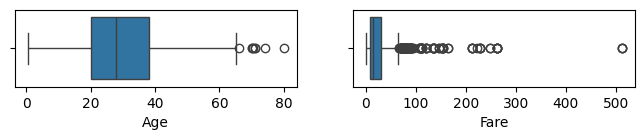

In [108]:
plt.figure(figsize=(8, 1))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient='h')

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    print(Q1)
    Q3 = df[col].quantile(0.75)
    print(Q3)
    IQR = Q3-Q1
    print(IQR)
    lower_fence = Q1-1.5*IQR
    upper_fence = Q3+1.5*IQR
    lower_outlier = df[df[col] <lower_fence][col].values
    upper_outlier = df[df[col] >upper_fence][col].values
    print(lower_outlier)
    print(upper_outlier)

    df[col].replace(lower_outlier, lower_fence)
    df[col].replace(upper_outlier, upper_fence)

# convert pipline

20.0
38.0
18.0
[]
[66.  71.  70.5 71.  80.  70.  70.  74. ]
7.8958
31.0
23.1042
[]
[ 71.2833 263.     146.5208  82.1708  76.7292  83.475   73.5    263.
  77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55    69.55
 146.5208  69.55   113.275   76.2917  90.      83.475   90.      79.2
  86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85    91.0792
 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375  164.8667
 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5    263.
  75.25    69.3    135.6333  82.1708 211.5    227.525   73.5    120.
 113.275   90.     120.     263.      81.8583  89.1042  91.0792  90.
  78.2667 151.55    86.5    108.9     93.5    221.7792 106.425   71.
 106.425  110.8833 227.525   79.65   110.8833  79.65    79.2     78.2667
 153.4625  77.9583  69.3     76.7292  73.5    113.275  133.65    73.5
 512.3292  76.7292 211.3375 110.8833 227.525  151.55   227.525  211.3375
 512.3292  78.85   262.375   71.      86.5    120.      77.9583 211.3

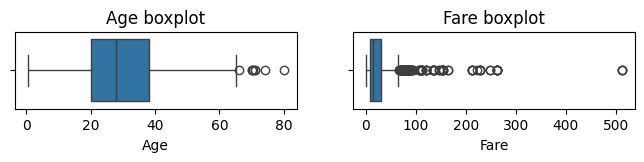

In [114]:
plt.figure(figsize=(8, 1))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} boxplot")

In [ ]:
# 4
# handle duplicates


In [115]:
df.duplicated().sum()

np.int64(111)

In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df.duplicated().sum()

np.int64(0)